In [2]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

In [3]:
function reshape2d_4d(img::AbstractArray)
    reshape(img, size(img)[1], size(img)[2], 1, 1)
end

reshape2d_4d (generic function with 1 method)

## CPU

In [4]:
img = convert(Array{Float32,2}, load(datadir("Iine_100_100_gs.png")));
img = reshape2d_4d(img)
# img = cu(img)
r = similar(img)

p = LaminartGPU.kernels_(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

In [5]:
# tspan = (0.0f0, 5f0)
# u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

In [6]:
tspan = (0.0f0, 5f0)
u0 = reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1);

In [7]:
arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

In [95]:
f = LaminartGPU.LamFunction_cpu(
    similar(arr1), # x
    similar(arr1), # y
    similar(arr1), # m
    similar(arr1), # z
    similar(arr1), # s
    similar(arr2), # v_p
    similar(arr2), # v_m
    similar(arr1), # dx
    similar(arr1), # dy
    similar(arr1), # dm
    similar(arr1), # dz
    similar(arr1), # ds
    similar(arr2), # dv_p
    similar(arr2), # dv_m
    similar(arr2), # x_lgn
    similar(arr1), # C
    similar(arr1), # H_z
    similar(arr2), # V_temp1
    similar(arr2), # V_temp2
    similar(arr1), # A_temp
    similar(arr1), # B_temp
    );

In [96]:
prob= ODEProblem(f, u0, tspan, p);

In [97]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  10.01 GiB
  allocs estimate:  88054
  --------------
  minimum time:     12.830 s (5.39% GC)
  median time:      12.830 s (5.39% GC)
  mean time:        12.830 s (5.39% GC)
  maximum time:     12.830 s (5.39% GC)
  --------------
  samples:          1
  evals/sample:     1

In [98]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033160916
 0.0014445226
 0.0050939126
 0.016530044
 0.048496544
 0.13082615
 0.28134108
 0.49049878
 0.7208309
 1.0911409
 1.5035485
 2.0877447
 2.7473993
 3.4705915
 4.4639435
 5.0
u: 20-element Array{Array{Float32,4},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0

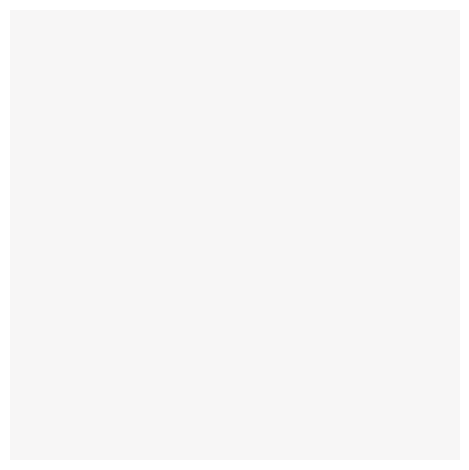

In [128]:
Utils.plot_rb(sol[10][:,:,9,1])

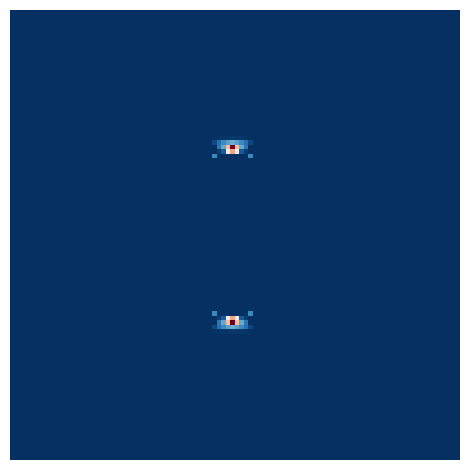

In [122]:
Utils.plot_rb(sol[end][:,:,6,1],axMax=0.022, axMin=0)

In [120]:
findmin(sol[end][:,:,5,1])

(0.0f0, CartesianIndex(1, 1))

In [133]:
findmax(sol[:,:,9,1,:])

(0.0007935341f0, CartesianIndex(33, 50, 20))

In [135]:
findmax(f.H_z)

(0.0037494781f0, CartesianIndex(33, 50, 1, 1))

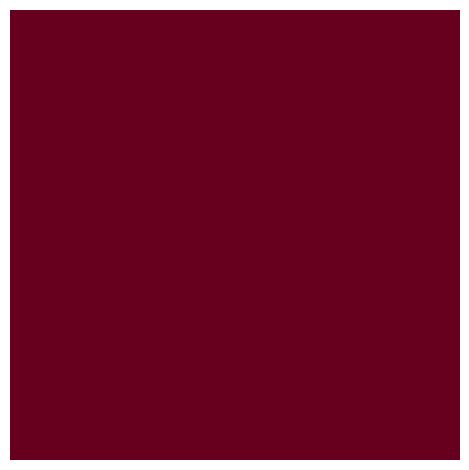

In [138]:
Utils.plot_rb(f.H_z[:,:,1,1],axMax=0.0038)

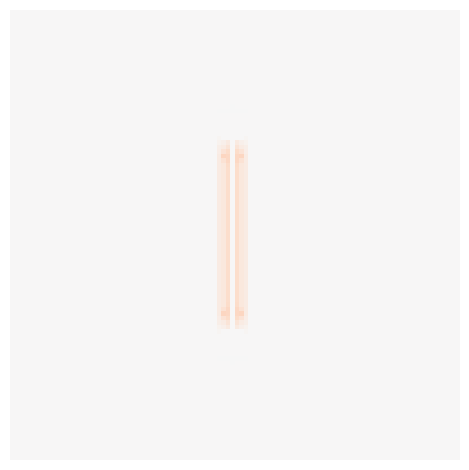

In [140]:
Utils.plot_rb(f.z[:,:,1,1])

In [ ]:
LaminartGPU.fun_ds!()

In [13]:
tspan

(0.0f0, 5.0f0)

In [14]:
p

(K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = 1.0f0, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = 0.5f0, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 5, H_σ_x = 3.0f0, H_σ_y = 4.0f0, H_fact = 5.0f0, H_l = 19, T_fact = Float32[0.87, 0.13], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u = 1.0f0, lgn_equ_A = 0.0f0, lgn_equ_B = 0.0f0, filling = "circular", W_l = 19, k_gauss_1 = Float32[0.0029690173 0.013306212 … 0.013306212 0.0029690173; 0.013306212 0.059634306 … 0.059634306 0.013306212; … ; 0.013306212 0.059634306 … 0.059634306 0.013306212; 0.0029690173 0.013306212 … 0.013306212 0.0029690173], k_gauss_2 = Float32[6.9624775f-8 2.808864f-5 … 2.808864f-5 6.9624775f-8; 2.808864f-5 0.011331766 … 0.011331766 2.808864f-5; … ; 2.808864f-5 0.011331766 … 0.01133176

In [51]:
du = similar(u0)
f(du, u0, p, 0f0)

In [52]:
du

100×100×12×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  Na

In [53]:
du[1,1,:,:]

12×1 Array{Float32,2}:
 NaN
 NaN
 NaN
 NaN
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

In [18]:
f.y

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [19]:
f.v_m

100×100×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [20]:
f.x_lgn

100×100×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [21]:
du

100×100×12×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  Na

In [24]:
LaminartGPU.fun_x_lgn!(f.x_lgn, f.x, p)

In [25]:
f.x_lgn

100×100×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [26]:
f.dx

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN

In [27]:
LaminartGPU.fun_dx_v1!(f.dx, f.x, f.C, f.z, p.x_V2, p)

In [28]:
f.dx

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN

In [29]:
f.dy

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN

In [30]:
LaminartGPU.fun_dy!(f.dy, f.y, f.C, f.x, f.m, p)
#         LaminartGPU.fun_dm!(f.dm, f.m, f.x, p)
#         LaminartGPU.fun_dz!(f.dz, ff.z, f.y, f.H_z, f.s, p)
#         LaminartGPU.fun_ds!(f.ds, f.s, f.H_z, p)

In [31]:
f.dy

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN

In [ ]:
LaminartGPU.fun_dy!(f.dy, f.y, f.C, f.x, f.m, p)
#         LaminartGPU.fun_dm!(f.dm, f.m, f.x, p)
#         LaminartGPU.fun_dz!(f.dz, ff.z, f.y, f.H_z, f.s, p)
#         LaminartGPU.fun_ds!(f.ds, f.s, f.H_z, p)

In [ ]:
LaminartGPU.fun_dy!(f.dy, f.y, f.C, f.x, f.m, p)
#         LaminartGPU.fun_dm!(f.dm, f.m, f.x, p)
#         LaminartGPU.fun_dz!(f.dz, ff.z, f.y, f.H_z, f.s, p)
#         LaminartGPU.fun_ds!(f.ds, f.s, f.H_z, p)

In [ ]:
LaminartGPU.fun_dy!(f.dy, f.y, f.C, f.x, f.m, p)
#         LaminartGPU.fun_dm!(f.dm, f.m, f.x, p)
#         LaminartGPU.fun_dz!(f.dz, ff.z, f.y, f.H_z, f.s, p)
#         LaminartGPU.fun_ds!(f.ds, f.s, f.H_z, p)

## GPU

In [80]:
img_g = convert(Array{Float32,2}, load(datadir("Iine_100_100_gs.png")));
img_g = reshape2d_4d(img_g)
img_g = cu(img_g)
r_g = similar(img_g)

p_g = LaminartGPU.kernels(img_g, Parameters.parameters);

LaminartGPU.I_u!(r_g, img_g, p_g)
temp_out_g = (I = img_g, r = r_g)
p_g = merge(p_g, temp_out_g);

In [81]:
# tspan = (0.0f0, 5f0)
# u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

In [82]:
# tspan = (0.0f0, 5f0)
u0_g = cu(reshape(zeros(Float32, p_g.dim_i, p_g.dim_j*(5*p_g.K+2)), p_g.dim_i, p_g.dim_j, 5*p_g.K+2,1));

In [83]:
arr1_g = u0_g[:, :, 1:p_g.K,:]
arr2_g = u0_g[:, :, 1:1,:];

In [84]:
f_g = LaminartGPU.LamFunction_gpu(
    similar(arr1_g), # x
    similar(arr1_g), # y
    similar(arr1_g), # m
    similar(arr1_g), # z
    similar(arr1_g), # s
    similar(arr2_g), # v_p
    similar(arr2_g), # v_m
    similar(arr1_g), # dx
    similar(arr1_g), # dy
    similar(arr1_g), # dm
    similar(arr1_g), # dz
    similar(arr1_g), # ds
    similar(arr2_g), # dv_p
    similar(arr2_g), # dv_m
    similar(arr2_g), # x_lgn
    similar(arr1_g), # C
    similar(arr1_g), # H_z
    similar(arr2_g), # V_temp1
    similar(arr2_g), # V_temp2
    similar(arr1_g), # A_temp
    similar(arr1_g), # B_temp
    );

In [85]:
du_g = similar(u0_g)
f_g(du_g, u0_g, p_g, 0f0)

In [42]:
findmax(du_g)

(0.6352054f0, CartesianIndex(31, 48, 11, 1))

In [88]:
prob = ODEProblem(f_g, u0_g, tspan, p)

ODEProblem with uType CuArray{Float32,4,Nothing} and tType Float32. In-place: true
timespan: (0.0f0, 5.0f0)
u0: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

In [89]:
sol_ = solve(prob)

TaskFailedException: TaskFailedException:
MethodError: no method matching gemm!(::Val{false}, ::Val{false}, ::Int64, ::Int64, ::Int64, ::Float32, ::CuPtr{Float32}, ::Ptr{Float32}, ::Float32, ::CuPtr{Float32})
Closest candidates are:
  gemm!(::Val, ::Val, ::Int64, ::Int64, ::Int64, ::Float32, !Matched::Ptr{Float32}, ::Ptr{Float32}, ::Float32, !Matched::Ptr{Float32}) at /mnt/storage_1/users/cullinanen/.julia/packages/NNlib/sSn9M/src/gemm.jl:35
  gemm!(::Val, ::Val, ::Int64, ::Int64, ::Int64, !Matched::Float64, !Matched::Ptr{Float64}, !Matched::Ptr{Float64}, !Matched::Float64, !Matched::Ptr{Float64}) at /mnt/storage_1/users/cullinanen/.julia/packages/NNlib/sSn9M/src/gemm.jl:35
  gemm!(::Val, ::Val, ::Int64, ::Int64, ::Int64, !Matched::Complex{Float64}, !Matched::Ptr{Complex{Float64}}, !Matched::Ptr{Complex{Float64}}, !Matched::Complex{Float64}, !Matched::Ptr{Complex{Float64}}) at /mnt/storage_1/users/cullinanen/.julia/packages/NNlib/sSn9M/src/gemm.jl:35
  ...
Stacktrace:
 [1] macro expansion at /mnt/storage_1/users/cullinanen/.julia/packages/NNlib/sSn9M/src/impl/conv_im2col.jl:58 [inlined]
 [2] (::NNlib.var"#430#threadsfor_fun#181"{CuArray{Float32,3,Nothing},Float32,Float32,CuArray{Float32,5,CuArray{Float32,4,Nothing}},CuArray{Float32,5,CuArray{Float32,4,Nothing}},Array{Float32,5},DenseConvDims{3,(1, 1, 1),2,1,(1, 1, 1),(0, 0, 0, 0, 0, 0),(1, 1, 1),true},Int64,Int64,Int64,UnitRange{Int64}})(::Bool) at ./threadingconstructs.jl:61
 [3] (::NNlib.var"#430#threadsfor_fun#181"{CuArray{Float32,3,Nothing},Float32,Float32,CuArray{Float32,5,CuArray{Float32,4,Nothing}},CuArray{Float32,5,CuArray{Float32,4,Nothing}},Array{Float32,5},DenseConvDims{3,(1, 1, 1),2,1,(1, 1, 1),(0, 0, 0, 0, 0, 0),(1, 1, 1),true},Int64,Int64,Int64,UnitRange{Int64}})() at ./threadingconstructs.jl:28

In [43]:
@time f_g(du_g, u0_g, p_g, 0f0)

  0.004422 seconds (4.59 k allocations: 225.984 KiB)


In [47]:
@time f(du, u0, p, 0f0)

  0.152860 seconds (757 allocations: 87.699 MiB)


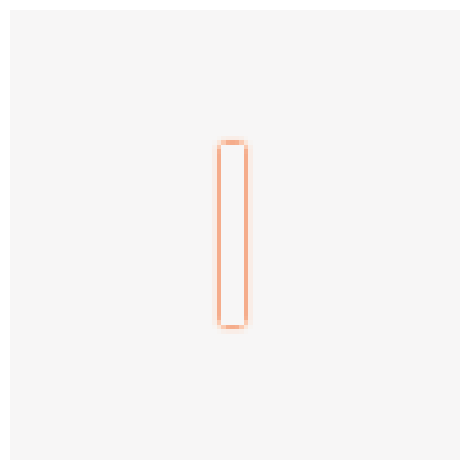

In [50]:
Utils.plot_rb(du_g[:,:,12,1])

In [54]:
p

(K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = 1.0f0, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = 0.5f0, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 5, H_σ_x = 3.0f0, H_σ_y = 4.0f0, H_fact = 5.0f0, H_l = 19, T_fact = Float32[0.87, 0.13], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u = 1.0f0, lgn_equ_A = 0.0f0, lgn_equ_B = 0.0f0, filling = "circular", W_l = 19, k_gauss_1 = Float32[0.0029690173 0.013306212 … 0.013306212 0.0029690173; 0.013306212 0.059634306 … 0.059634306 0.013306212; … ; 0.013306212 0.059634306 … 0.059634306 0.013306212; 0.0029690173 0.013306212 … 0.013306212 0.0029690173], k_gauss_2 = Float32[6.9624775f-8 2.808864f-5 … 2.808864f-5 6.9624775f-8; 2.808864f-5 0.011331766 … 0.011331766 2.808864f-5; … ; 2.808864f-5 0.011331766 … 0.01133176

In [55]:
p_g

(K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = 1.0f0, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = 0.5f0, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 5, H_σ_x = 3.0f0, H_σ_y = 4.0f0, H_fact = 5.0f0, H_l = 19, T_fact = Float32[0.87, 0.13], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u = 1.0f0, lgn_equ_A = 0.0f0, lgn_equ_B = 0.0f0, filling = "circular", W_l = 19, k_gauss_1 = Float32[0.0029690173 0.013306212 … 0.013306212 0.0029690173; 0.013306212 0.059634306 … 0.059634306 0.013306212; … ; 0.013306212 0.059634306 … 0.059634306 0.013306212; 0.0029690173 0.013306212 … 0.013306212 0.0029690173], k_gauss_2 = Float32[6.9624775f-8 2.808864f-5 … 2.808864f-5 6.9624775f-8; 2.808864f-5 0.011331766 … 0.011331766 2.808864f-5; … ; 2.808864f-5 0.011331766 … 0.01133176

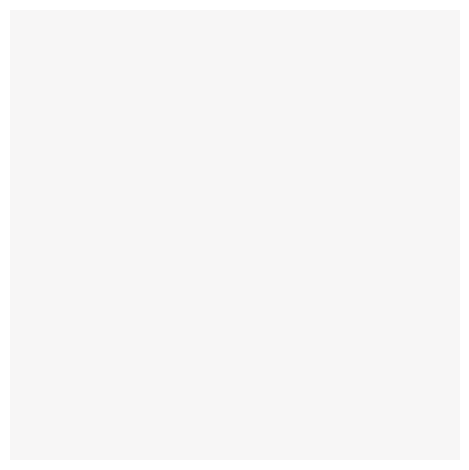

In [58]:
Utils.plot_rb(du[:,:,7,1])

In [59]:
du = similar(u0)

100×100×12×1 Array{Float32,4}:
[:, :, 1, 1] =
 2.35099f-38  2.35099f-38  2.35099f-38  …  2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38  …  2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38  …  2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 2.35099f-38  2.35099f-38  2.35099f-38     2.35099f-38  2.35099f-38
 ⋮                                      ⋱               
 2.35099f-38 

In [60]:
f(du, u0, p, 0f0)
du

100×100×12×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  Na

In [61]:
p.att

0.0f0

In [62]:
p_g.att

0.0f0

In [63]:
#   fun_dx_v1!(ff.dx, ff.x, ff.C, ff.z, p.x_V2, p)
#         fun_dy!(ff.dy, ff.y, ff.C, ff.x, ff.m, p) 

p.δ_c * (-f.x + ((1.0f0 - f.x) * ((p.α * f.C) + (p.ϕ * max(f.z - p.Γ, 0f0)) .+ (p.v_21 * p.x_v2))

LoadError: syntax: incomplete: premature end of input

In [65]:
f.C

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN

In [66]:
f.H_z

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [67]:
f.x_lgn

100×100×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [ ]:
@. V_temp_2 = exp(-1.0f0 / 8.0f0) * (max(v_p, 0f0) - max(v_m, 0f0))

In [68]:
f.V_temp_2

100×100×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [70]:
f.B_temp

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN

In [71]:
p.k_C_B

5×5×1×2 Array{Float32,4}:
[:, :, 1, 1] =
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495

[:, :, 1, 2] =
 0.12495     0.12495     0.12495    0.12495     0.12495
 0.0404873   0.0404873   0.0404873  0.0404873   0.0404874
 1.86265f-9  1.86265f-9  0.0        1.86265f-9  1.86265f-9
 0.0404874   0.0404873   0.0404873  0.0404873   0.0404873
 0.12495     0.12495     0.12495    0.12495     0.12495

In [73]:
f.V_temp_1

100×100×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [75]:
LaminartGPU.conv!(f.B_temp, f.V_temp_1, p.k_C_B, p)

In [76]:
f.B_temp

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [79]:
f.C

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN

In [92]:
LaminartGPU.fun_v_C!(f.C, f.v_p, f.v_m, f.V_temp_1, f.V_temp_2, f.A_temp, f.B_temp, p)

In [94]:
f.C

100×100×2×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [91]:
@. f_g.B_temp = abs(f_g.B_temp)

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [164]:
f = LaminartGPU.LamFunction_cpu2(
    similar(arr1), # x
    similar(arr1), # y
    similar(arr1), # m
    similar(arr1), # z
    similar(arr1), # s
    similar(arr2), # v_p
    similar(arr2), # v_m
    similar(arr1), # dx
    similar(arr1), # dy
    similar(arr1), # dm
    similar(arr1), # dz
    similar(arr1), # ds
    similar(arr2), # dv_p
    similar(arr2), # dv_m
    similar(arr2), # x_lgn
    similar(arr1), # C
    similar(arr1), # H_z
    similar(arr1), # ds_temp
    similar(arr1), # H_z_temp
    similar(arr2), # V_temp1
    similar(arr2), # V_temp2
    similar(arr1), # A_temp
    similar(arr1), # B_temp
    );

In [165]:
prob= ODEProblem(f, u0, tspan, p);

In [166]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033160916
 0.0014445226
 0.0050939126
 0.016530044
 0.048496544
 0.13082615
 0.28134108
 0.49049878
 0.7208309
 1.0911409
 1.5035485
 2.0877447
 2.7473993
 3.4705915
 4.4639435
 5.0
u: 20-element Array{Array{Float32,4},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0

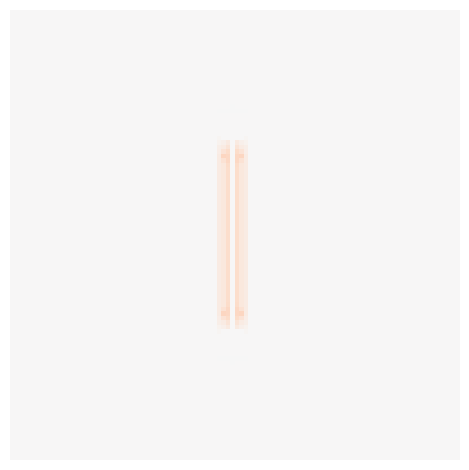

In [181]:
Utils.plot_rb(sol[end][:,:,7,1])

In [178]:
findmax(sol[end][:,:,7,1])

(0.2166561f0, CartesianIndex(33, 48))

In [157]:
findmax(f.H_z)

(0.0037494781f0, CartesianIndex(33, 50, 1, 1))

In [182]:
f_g = LaminartGPU.LamFunction_gpu2(
    similar(arr1_g), # x
    similar(arr1_g), # y
    similar(arr1_g), # m
    similar(arr1_g), # z
    similar(arr1_g), # s
    similar(arr2_g), # v_p
    similar(arr2_g), # v_m
    similar(arr1_g), # dx
    similar(arr1_g), # dy
    similar(arr1_g), # dm
    similar(arr1_g), # dz
    similar(arr1_g), # ds
    similar(arr2_g), # dv_p
    similar(arr2_g), # dv_m
    similar(arr2_g), # x_lgn
    similar(arr1_g), # C
    similar(arr1_g), # H_z
    similar(arr1_g), # ds_temp
    similar(arr1_g), # H_z_temp
    similar(arr2_g), # V_temp1
    similar(arr2_g), # V_temp2
    similar(arr1_g), # A_temp
    similar(arr1_g), # B_temp
    );

In [183]:
prob_g = ODEProblem(f_g, u0_g, tspan, p_g);

In [184]:
sol_g = solve(prob_g)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033172502
 0.0014759909
 0.005392259
 0.017146833
 0.051452193
 0.13315387
 0.28310412
 0.49007082
 0.7197511
 1.0883753
 1.4995799
 2.081981
 2.7438252
 3.448669
 4.4254713
 5.0
u: 20-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

In [185]:
@time sol_g = solve(prob_g)

  0.445382 seconds (555.94 k allocations: 27.218 MiB)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033172502
 0.0014759909
 0.005392259
 0.017146833
 0.051452193
 0.13315387
 0.28310412
 0.49007082
 0.7197511
 1.0883753
 1.4995799
 2.081981
 2.7438252
 3.448669
 4.4254713
 5.0
u: 20-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

In [186]:
@benchmark sol_g = solve(prob_g)

BenchmarkTools.Trial: 
  memory estimate:  27.03 MiB
  allocs estimate:  554746
  --------------
  minimum time:     416.249 ms (0.00% GC)
  median time:      424.430 ms (0.00% GC)
  mean time:        436.779 ms (1.62% GC)
  maximum time:     591.396 ms (14.31% GC)
  --------------
  samples:          12
  evals/sample:     1

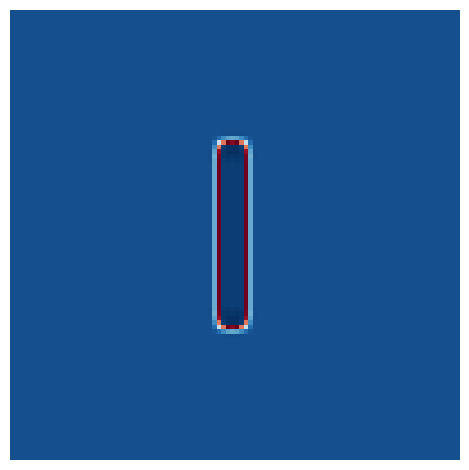

In [218]:
k=12

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

In [188]:
typeof(sol_g[end])

CuArray{Float32,4,Nothing}

In [195]:
findmax(sol_g[end][:,:,k,1])

(0.021873657f0, CartesianIndex(31, 50))

In [243]:
f_1 = LaminartGPU.LamFunction_gpu11(
    similar(arr1_g), # x
    similar(arr1_g), # y
    similar(arr1_g), # m
    similar(arr1_g), # z
    similar(arr1_g), # s
    similar(arr2_g), # v_p
    similar(arr2_g), # v_m
#     similar(arr1), # dx
#     similar(arr1), # dy
#     similar(arr1), # dm
#     similar(arr1), # dz
#     similar(arr1), # ds
#     similar(arr2), # dv_p
#     similar(arr2), # dv_m
    similar(arr2_g), # x_lgn
    similar(arr1_g), # C
    similar(arr1_g), # H_z
    similar(arr1_g), # dy_temp
    similar(arr1_g), # dv_temp
    similar(arr1_g), # ds_temp
    similar(arr1_g), # H_z_temp
    similar(arr2_g), # V_temp1
    similar(arr2_g), # V_temp2
    similar(arr1_g), # A_temp
    similar(arr1_g), # B_temp
    );

In [244]:
# findmax(u0_g)

In [247]:
prob_g1 = ODEProblem(f_1, u0_g, tspan, p_g);

In [248]:
sol_g1 = solve(prob_g1)

TaskFailedException: TaskFailedException:
ArgumentError: cannot take the CPU address of a CuArray{Float32,4,Nothing}
Stacktrace:
 [1] unsafe_convert(::Type{Ptr{Float32}}, ::CuArray{Float32,4,Nothing}) at /mnt/storage_1/users/cullinanen/.julia/packages/CUDA/h38pe/src/array.jl:240
 [2] unsafe_convert(::Type{Ptr{Float32}}, ::SubArray{Float32,4,CuArray{Float32,4,Nothing},Tuple{Base.Slice{Base.OneTo{Int64}},Base.Slice{Base.OneTo{Int64}},UnitRange{Int64},Base.Slice{Base.OneTo{Int64}}},false}) at ./subarray.jl:383
 [3] unsafe_convert(::Type{Ptr{Float32}}, ::Base.ReshapedArray{Float32,5,SubArray{Float32,4,CuArray{Float32,4,Nothing},Tuple{Base.Slice{Base.OneTo{Int64}},Base.Slice{Base.OneTo{Int64}},UnitRange{Int64},Base.Slice{Base.OneTo{Int64}}},false},Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}) at ./reshapedarray.jl:281
 [4] pointer at ./abstractarray.jl:936 [inlined]
 [5] macro expansion at /mnt/storage_1/users/cullinanen/.julia/packages/NNlib/sSn9M/src/impl/conv_im2col.jl:57 [inlined]
 [6] (::NNlib.var"#430#threadsfor_fun#181"{CuArray{Float32,3,Nothing},Float32,Float32,Base.ReshapedArray{Float32,5,SubArray{Float32,4,CuArray{Float32,4,Nothing},Tuple{Base.Slice{Base.OneTo{Int64}},Base.Slice{Base.OneTo{Int64}},UnitRange{Int64},Base.Slice{Base.OneTo{Int64}}},false},Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}},CuArray{Float32,5,CuArray{Float32,4,Nothing}},CuArray{Float32,5,CuArray{Float32,4,Nothing}},DenseConvDims{3,(5, 5, 1),1,1,(1, 1, 1),(2, 2, 2, 2, 0, 0),(1, 1, 1),true},Int64,Int64,Int64,UnitRange{Int64}})(::Bool) at ./threadingconstructs.jl:61
 [7] (::NNlib.var"#430#threadsfor_fun#181"{CuArray{Float32,3,Nothing},Float32,Float32,Base.ReshapedArray{Float32,5,SubArray{Float32,4,CuArray{Float32,4,Nothing},Tuple{Base.Slice{Base.OneTo{Int64}},Base.Slice{Base.OneTo{Int64}},UnitRange{Int64},Base.Slice{Base.OneTo{Int64}}},false},Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}},CuArray{Float32,5,CuArray{Float32,4,Nothing}},CuArray{Float32,5,CuArray{Float32,4,Nothing}},DenseConvDims{3,(5, 5, 1),1,1,(1, 1, 1),(2, 2, 2, 2, 0, 0),(1, 1, 1),true},Int64,Int64,Int64,UnitRange{Int64}})() at ./threadingconstructs.jl:28

In [ ]:
@time sol_g1 = solve(prob_g1)

In [249]:
tt = cu([1,-1])

┌ Error: Failed to revise /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│   exception = (LoadError("/mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl", 1622, "missing comma or ) in argument list"), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f85884cdcb3])
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:760
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report e

2-element CuArray{Int64,1,Nothing}:
  1
 -1

In [250]:
@. tt = abs(tt)

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820


2-element CuArray{Int64,1,Nothing}:
 1
 1

In [251]:
mm = cu([3,3])

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820


2-element CuArray{Int64,1,Nothing}:
 3
 3

In [254]:
@. tt = m * abs(tt)

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820


UndefVarError: UndefVarError: m not defined

In [253]:
tt

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820


2-element CuArray{Int64,1,Nothing}:
 1
 1

In [274]:
f_1 = LaminartGPU.LamFunction_gpu14(
    similar(arr1_g), # x
    similar(arr1_g), # y
    similar(arr1_g), # m
    similar(arr1_g), # z
    similar(arr1_g), # s
    similar(arr2_g), # v_p
    similar(arr2_g), # v_m
#     similar(arr1), # dx
#     similar(arr1), # dy
#     similar(arr1), # dm
#     similar(arr1), # dz
#     similar(arr1), # ds
#     similar(arr2), # dv_p
#     similar(arr2), # dv_m
    similar(arr2_g), # x_lgn
    similar(arr1_g), # C
    similar(arr1_g), # H_z
    similar(arr1_g), # dy_temp
    similar(arr1_g), # dm_temp
    similar(arr1_g), # dz_temp
    similar(arr1_g), # ds_temp
    similar(arr2_g), # dv_temp
    similar(arr1_g), # H_z_temp
    similar(arr2_g), # V_temp1
    similar(arr2_g), # V_temp2
    similar(arr1_g), # A_temp
    similar(arr1_g), # B_temp
    );

In [275]:
prob_g = ODEProblem(f_1, u0_g, tspan, p_g);

In [276]:
sol_g = solve(prob_g)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033172502
 0.0014759909
 0.005392259
 0.017146833
 0.051452193
 0.13315387
 0.28310412
 0.49007082
 0.7197511
 1.0883753
 1.4995799
 2.081981
 2.7438252
 3.448669
 4.4254713
 5.0
u: 20-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

In [265]:
f_g.dv_temp

ErrorException: type LamFunction_gpu2 has no field dv_temp

In [271]:
du_ = similar(u0)
dv_p = @view du_[:, :, 5*p.K+1:5*p.K+1,:]
LaminartGPU.fun_dv!(dv_p, f_g.v_p, p_g.r, f_g.x_lgn, f_g.dv_temp, p_g)

ErrorException: type LamFunction_gpu2 has no field dv_temp

In [282]:
@time sol_g = solve(prob_g)

  0.450489 seconds (510.75 k allocations: 25.041 MiB)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033172502
 0.0014759909
 0.005392259
 0.017146833
 0.051452193
 0.13315387
 0.28310412
 0.49007082
 0.7197511
 1.0883753
 1.4995799
 2.081981
 2.7438252
 3.448669
 4.4254713
 5.0
u: 20-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

In [283]:
@benchmark sol_g = solve(prob_g)

BenchmarkTools.Trial: 
  memory estimate:  25.02 MiB
  allocs estimate:  509580
  --------------
  minimum time:     396.658 ms (0.00% GC)
  median time:      406.186 ms (0.00% GC)
  mean time:        428.432 ms (3.35% GC)
  maximum time:     675.374 ms (25.47% GC)
  --------------
  samples:          12
  evals/sample:     1

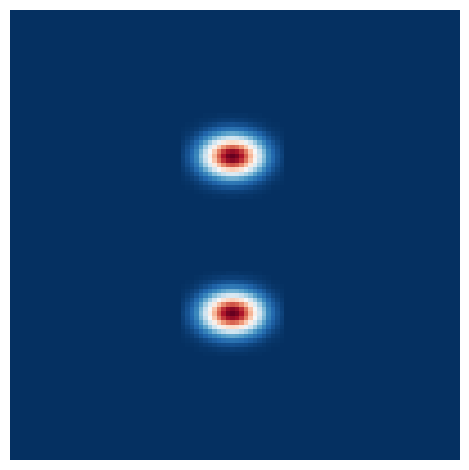

In [287]:
k=9

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

In [331]:
du_ = similar(u0_g)
@time f_1(du_, u0_g, p_g, 0.0f0)

  0.004904 seconds (4.50 k allocations: 241.281 KiB)


In [332]:
prob_g1 = ODEProblem(f_1, u0_g, tspan, p_g)
@benchmark sol_g1 = solve(prob_g1)

BenchmarkTools.Trial: 
  memory estimate:  28.83 MiB
  allocs estimate:  547744
  --------------
  minimum time:     411.164 ms (0.00% GC)
  median time:      424.861 ms (0.00% GC)
  mean time:        444.439 ms (3.40% GC)
  maximum time:     669.841 ms (27.05% GC)
  --------------
  samples:          12
  evals/sample:     1

In [186]:
@benchmark sol_g = solve(prob_g) #old

BenchmarkTools.Trial: 
  memory estimate:  27.03 MiB
  allocs estimate:  554746
  --------------
  minimum time:     416.249 ms (0.00% GC)
  median time:      424.430 ms (0.00% GC)
  mean time:        436.779 ms (1.62% GC)
  maximum time:     591.396 ms (14.31% GC)
  --------------
  samples:          12
  evals/sample:     1

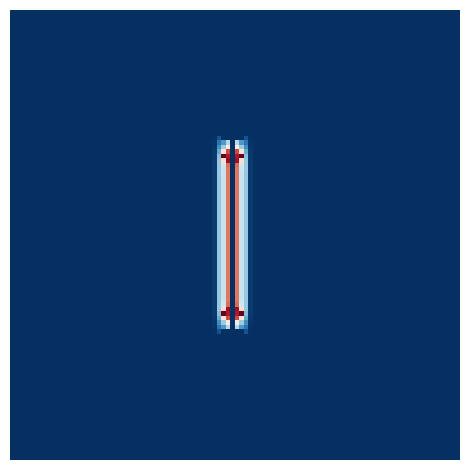

In [334]:
k=1

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

In [335]:
a = @view u0[:,:,:,:]

Revise.LogRecord(Error, evaluation error starting at /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl:232, lowered, Revise_e943ed8b, "/mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/lowered.jl", 106, (mod=MEngProject.LaminartGPU, ex=begin
    #= /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl:232 =#
    mutable struct LamFunction_gpu14{T <: CuArray{Float32, 4, Nothing}} <: Function
        #= /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl:233 =#
        x::T
        #= /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl:234 =#
        y::T
        #= /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl:235 =#
        m::AbstractArray
        #= /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl:236 =#
        z::T
        #= /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl:237 =#
  

100×100×12×1 view(::Array{Float32,4}, :, :, :, :) with eltype Float32:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.

In [337]:
a <:AbstractArray

TypeError: TypeError: in <:, expected Type, got SubArray{Float32,4,Array{Float32,4},NTuple{4,Base.Slice{Base.OneTo{Int64}}},true}

In [338]:
Float64 <: Real

true

In [339]:
typeof(a) <: AbstractArray

true

In [425]:
uu = similar(u0_g)
x = similar(arr1_g)
	y= @view uu[:, :, p.K+1:2*p.K,:]
	m=similar(arr1_g)
	z= @view uu[:, :, 3*p.K+1:4*p.K,:]
	s=similar(arr1_g)
	v_p= @view uu[:, :, 5*p.K+1:5*p.K+1,:]
	v_m= @view uu[:, :, 5*p.K+2:5*p.K+2,:]
	dx= @view uu[:, :, 1:p.K,:]
	dy= @view uu[:, :, p.K+1:2*p.K,:]
	dm= @view uu[:, :, 2*p.K+1:3*p.K,:]
	dz= @view uu[:, :, 3*p.K+1:4*p.K,:]
	ds= @view uu[:, :, 4*p.K+1:5*p.K,:]
	dv_p= @view uu[:, :, 5*p.K+1:5*p.K+1,:]
	dv_m= @view uu[:, :, 5*p.K+2:5*p.K+2,:]
	x_lgn=similar(arr2_g)
	C=similar(arr1_g)
	H_z=similar(arr1_g)
	dy_temp=similar(arr1_g)
	dm_temp=similar(arr1_g)
	dz_temp=similar(arr1_g)
	ds_temp=similar(arr1_g)
	dv_temp=similar(arr2_g)
	H_z_temp=similar(arr1_g)
	V_temp_1=similar(arr2_g)
	V_temp_2=similar(arr2_g)
	A_temp=similar(arr1_g)
	B_temp=similar(arr1_g);

In [428]:
f_2 = LaminartGPU.LamFunction_gpu29(
    similar(arr1_g), #x
    similar(arr1_g), #m
    similar(arr1_g), #s
 similar(arr2_g), #x_lgn,
similar(arr1_g), #C,
similar(arr1_g), #H_z,
similar(arr1_g), # dy_temp,
similar(arr1_g), # dm_temp,
similar(arr1_g), # dz_temp,
similar(arr1_g), # ds_temp,
similar(arr2_g), # dv_temp,
similar(arr1_g), # H_z_temp,
similar(arr2_g), #  V_temp_1,
similar(arr2_g), #  V_temp_2,
similar(arr1_g), #  A_temp,
similar(arr1_g), #   B_temp
    );

In [429]:
prob_2 = ODEProblem(f_2, u0_g, tspan, p_g);

In [430]:
@benchmark sol_2 = solve(prob_2)

BenchmarkTools.Trial: 
  memory estimate:  28.77 MiB
  allocs estimate:  560275
  --------------
  minimum time:     417.792 ms (0.00% GC)
  median time:      424.158 ms (0.00% GC)
  mean time:        441.508 ms (1.71% GC)
  maximum time:     618.613 ms (14.66% GC)
  --------------
  samples:          12
  evals/sample:     1

In [413]:
@benchmark sol_2 = solve(prob_2)

BenchmarkTools.Trial: 
  memory estimate:  28.77 MiB
  allocs estimate:  560272
  --------------
  minimum time:     437.027 ms (0.00% GC)
  median time:      446.620 ms (0.00% GC)
  mean time:        462.351 ms (1.84% GC)
  maximum time:     636.067 ms (14.70% GC)
  --------------
  samples:          11
  evals/sample:     1

In [388]:
du_ = similar(u0_g)
@time f_2(du_, u0_g, p_g, 0.0f0)

  0.004613 seconds (4.51 k allocations: 241.719 KiB)


In [431]:
f_2 = LaminartGPU.LamFunction_gpu100(
 similar(arr2_g), #x_lgn,
similar(arr1_g), #C,
similar(arr1_g), #H_z,
similar(arr2_g), # tmp_a
similar(arr2_g), # tmp_b
similar(arr1_g), # tmp_A
similar(arr1_g), # tmp_B
similar(arr1_g), # tmp_C
    );

In [432]:
prob_2 = ODEProblem(f_2, u0_g, tspan, p_g);

In [434]:
@benchmark sol_3 = solve(prob_2)

BenchmarkTools.Trial: 
  memory estimate:  28.77 MiB
  allocs estimate:  560275
  --------------
  minimum time:     414.494 ms (0.00% GC)
  median time:      421.834 ms (0.00% GC)
  mean time:        442.031 ms (2.05% GC)
  maximum time:     666.537 ms (16.30% GC)
  --------------
  samples:          12
  evals/sample:     1

In [413]:
@benchmark sol_2 = solve(prob_2)

BenchmarkTools.Trial: 
  memory estimate:  28.77 MiB
  allocs estimate:  560272
  --------------
  minimum time:     437.027 ms (0.00% GC)
  median time:      446.620 ms (0.00% GC)
  mean time:        462.351 ms (1.84% GC)
  maximum time:     636.067 ms (14.70% GC)
  --------------
  samples:          11
  evals/sample:     1

In [389]:
@time solve(prob_2)

  0.551894 seconds (550.31 k allocations: 28.872 MiB)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 1.0361395f-5
 6.658771f-5
 0.00035259433
 0.0014053298
 0.00497182
 0.016773194
 0.050172202
 0.13026771
 0.28757283
 0.5043977
 0.7175377
 1.0176935
 1.2530879
 1.8931785
 2.3969567
 3.285822
 4.2123146
 5.0
u: 20-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

In [399]:
@time sol_3 = solve(prob_2)

┌ Error: Failed to revise /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│   exception = (KeyError(Tuple{MEngProject.LaminartGPU.LamFunction_gpu14,Any,Any,Any,Any}), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f85884d829f])
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:760
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/Revise.jl:820
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/LaminartGPU.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /mnt/storage_1/users/cullinanen/.jul

MethodError: MethodError: no method matching (::MEngProject.LaminartGPU.LamFunction_gpu21)(::CuArray{Float32,4,Nothing}, ::CuArray{Float32,4,Nothing}, ::NamedTuple{(:K, :δ_v, :δ_c, :δ_m, :δ_z, :δ_s, :σ_1, :C_1, :C_2, :σ_2, :γ, :α, :ϕ, :Γ, :v_21, :μ, :ν, :n, :att, :η_p, :η_m, :λ, :a_23_ex, :a_23_in, :v12_6, :v12_4, :ψ, :C_AB_l, :H_σ_x, :H_σ_y, :H_fact, :H_l, :T_fact, :T_p_m, :T_v2_fact, :H_size, :W_size, :lgn_equ_u, :lgn_equ_A, :lgn_equ_B, :filling, :W_l, :k_gauss_1, :k_gauss_2, :k_C_A, :k_C_B, :k_x_lgn, :k_W_p, :k_W_m, :k_H, :k_T_p, :k_T_m, :k_T_p_v2, :k_T_m_v2, :dim_i, :dim_j, :x_V2, :ν_pw_n, :I, :r),Tuple{Int64,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Int64,Float32,Float32,Float32,Int64,Array{Float32,1},Float32,Float32,Int64,Int64,Float32,Float32,Float32,String,Int64,CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},Int64,Int64,CuArray{Float32,4,Nothing},Float32,CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing}}}, ::Float32)

In [437]:
f_g = LaminartGPU.LamFunction(
    similar(arr1_g), #x
    similar(arr1_g), #m
    similar(arr1_g), #s
 similar(arr2_g), #x_lgn,
similar(arr1_g), #C,
similar(arr1_g), #H_z,
similar(arr1_g), # dy_temp,
similar(arr1_g), # dm_temp,
similar(arr1_g), # dz_temp,
similar(arr1_g), # ds_temp,
similar(arr2_g), # dv_temp,
similar(arr1_g), # H_z_temp,
similar(arr2_g), #  V_temp_1,
similar(arr2_g), #  V_temp_2,
similar(arr1_g), #  A_temp,
similar(arr1_g), #   B_temp
    );

In [439]:
prob_g = ODEProblem(f_g, u0_g, tspan, p_g);

In [440]:
@benchmark sol_g = solve(prob_g)

BenchmarkTools.Trial: 
  memory estimate:  28.77 MiB
  allocs estimate:  560275
  --------------
  minimum time:     430.636 ms (0.00% GC)
  median time:      438.821 ms (0.00% GC)
  mean time:        458.497 ms (1.93% GC)
  maximum time:     648.168 ms (14.98% GC)
  --------------
  samples:          11
  evals/sample:     1

In [445]:
sol_g = solve(prob_g)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033172502
 0.0014759909
 0.005392259
 0.017146833
 0.051452193
 0.13315387
 0.28310412
 0.49007082
 0.7197511
 1.0883753
 1.4995799
 2.081981
 2.7438252
 3.448669
 4.4254713
 5.0
u: 20-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

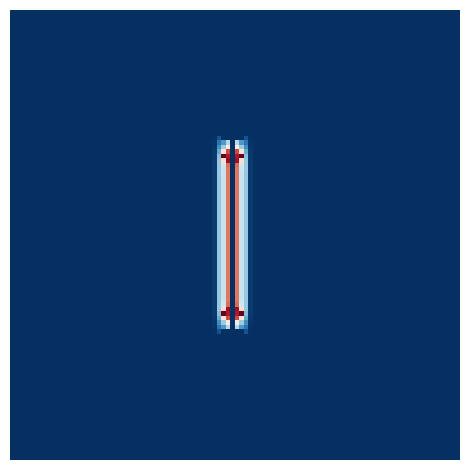

In [447]:
k=1

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

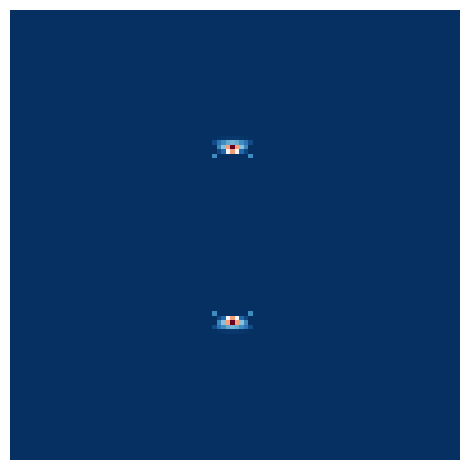

In [451]:
k=2

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

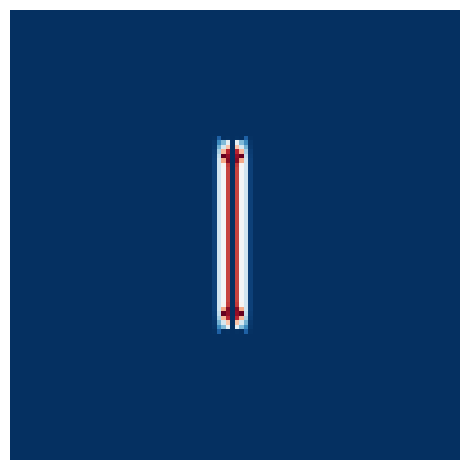

In [452]:
k=3

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

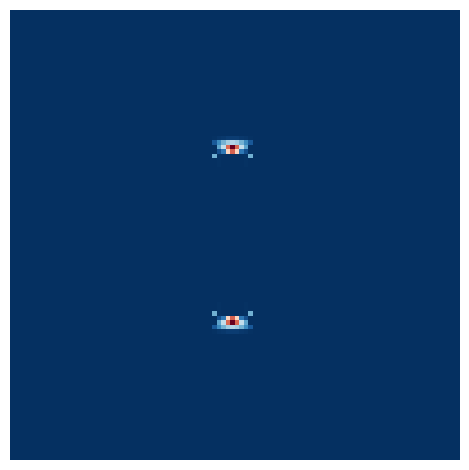

In [453]:
k=4

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

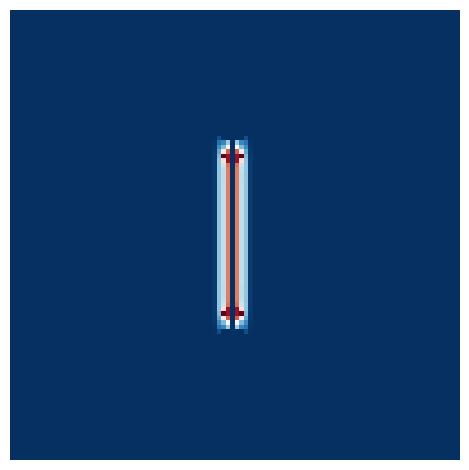

In [454]:
k=5

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

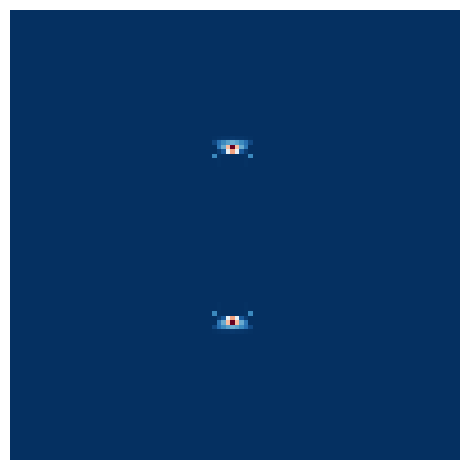

In [455]:
k=6

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

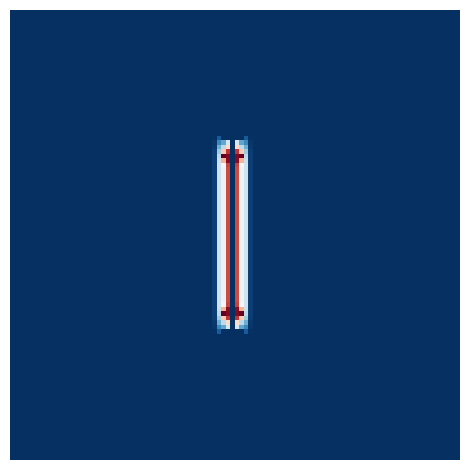

In [456]:
k=7

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

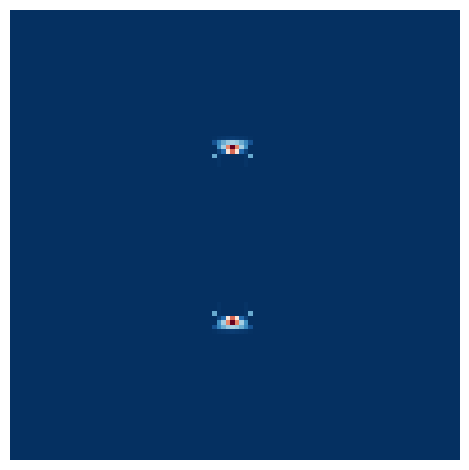

In [457]:
k=8

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

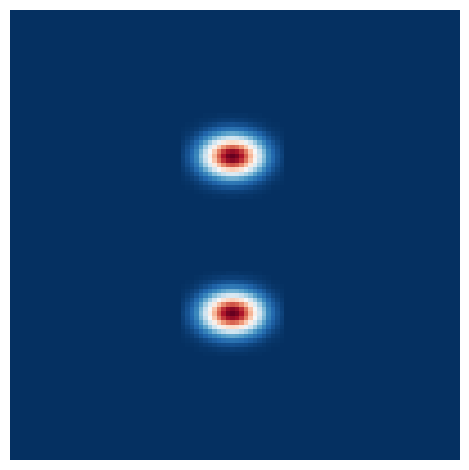

In [458]:
k=9

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

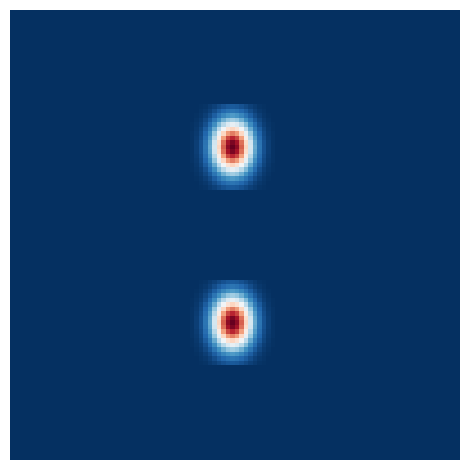

In [459]:
k=10

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

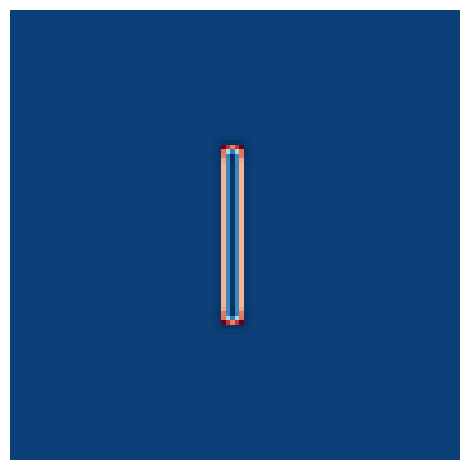

In [460]:
k=11

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

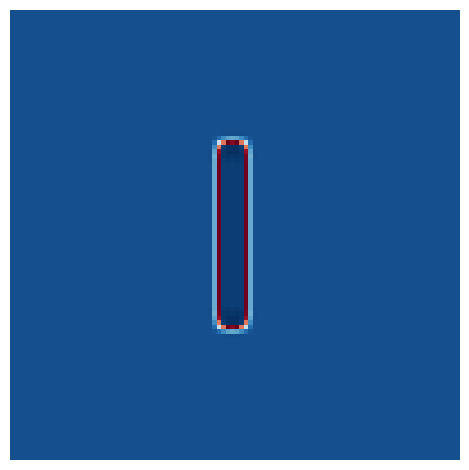

In [461]:
k=12

Utils.plot_rb(sol_g[end][:,:,k,1], axMax=findmax(sol_g[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

In [442]:
f_c = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

In [443]:
prob_c = ODEProblem(f_c, u0, tspan, p);

In [444]:
@benchmark sol_c = solve(prob_c)

BenchmarkTools.Trial: 
  memory estimate:  10.01 GiB
  allocs estimate:  59853
  --------------
  minimum time:     12.212 s (3.38% GC)
  median time:      12.212 s (3.38% GC)
  mean time:        12.212 s (3.38% GC)
  maximum time:     12.212 s (3.38% GC)
  --------------
  samples:          1
  evals/sample:     1

In [446]:
sol_c = solve(prob_c)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20-element Array{Float32,1}:
 0.0
 1.0f-6
 9.345251f-6
 6.192009f-5
 0.00033160916
 0.0014445226
 0.0050939126
 0.016530044
 0.048496544
 0.13082615
 0.28134108
 0.49049878
 0.7208309
 1.0911409
 1.5035485
 2.0877447
 2.7473993
 3.4705915
 4.4639435
 5.0
u: 20-element Array{Array{Float32,4},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0

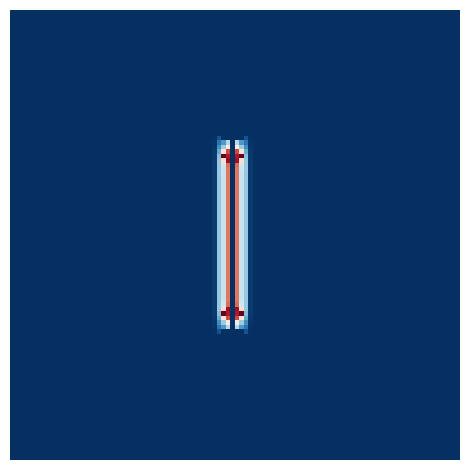

In [448]:
k=1

Utils.plot_rb(sol_c[end][:,:,k,1], axMax=findmax(sol_c[end][:,:,k,1])[1], axMin=findmin(sol_g[end][:,:,k,1])[1])

In [450]:
@test Array(sol_g[end]) ≈ sol_c[end]

Test Passed